Importing all the required libraries:

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Loading the data from csv file into pandas dataframe.

In [18]:
df = pd.read_csv(r"C:\Users\HP\Desktop\New folder\Mall_Customers.csv")

Showing the top 5 rows of the dataset using head() method:

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Number of total rows and columns present in the dataset:

In [5]:
df.shape

(200, 5)

Now check for the data types an null values:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


All the data-types are correct. Also, there aare no null values present in any column as the total number of rows and number of non-null values present are equal.

We can also check for null values using isnull function.

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

If any of the sum is non-zero, we can remove the null values or replace the null values depending the amount of data and our requirement.

Now, As we are analysing the customer behaviour, we do not need CustomerId column for this, so we can drop this column.

In [8]:
df.drop(['CustomerID'], axis=1, inplace=True)

In [9]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


we have successfully dropped CustomerId. 

Now, replacing the gender values, 0 for female and 1 for male:

In [10]:
df['Gender'].replace(['Female', 'Male'], [0,1], inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


Now let's observe the statistics of each numerical column present in this dataset:

In [11]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


We can see this dataset contains the data of people lying between 18-70 age. Max and Min annual income is 15 and 137 $. The average spending score is 50.2

## EDA with Data Visualizations:

EDA is process of performing initial invesigaion on data so as to draw the raw conclusion, discover patterns and spot outliers. We check hypothesis etc using visualization tools.

Data Visualization is graphical representation of data which helps to get better insight by plotting all the data collectively.

We will now try to get better insight of data using matplotlib and seaborn library.

Number of Males and Females:

In [12]:
df['Gender'].value_counts()

Gender
0    112
1     88
Name: count, dtype: int64

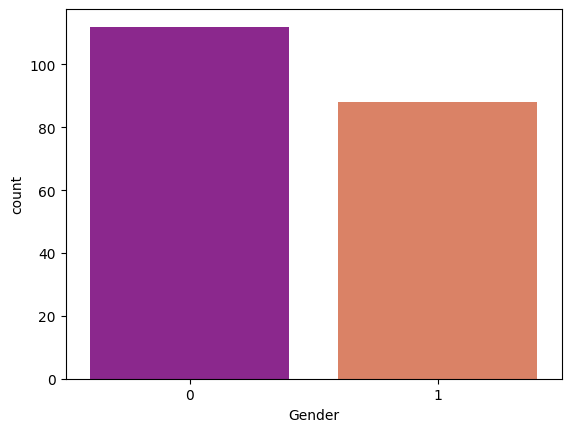

In [36]:
sns.countplot(x='Gender', data=df, palette='plasma');

Female customers are more than male cusomers.

Lets try to find out if any outliers present in the data:

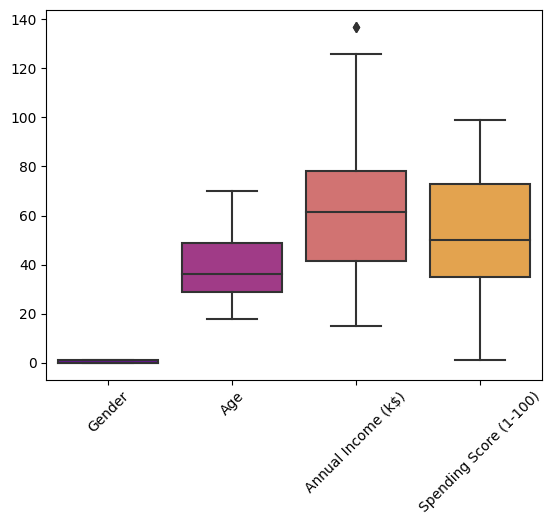

In [37]:
sns.boxplot(data=df, palette='plasma')
plt.xticks(rotation=45)
plt.show()

1. It can be clearly seen that an outlier exists in the ANNUAL INCOME feature.
2. 25% of the customer have age below 30 and 75% customers have age below 45.
3. 75% customers have annual income below 75K.

Note- These values are apprximately similar to the values that we calculated through describe() function.

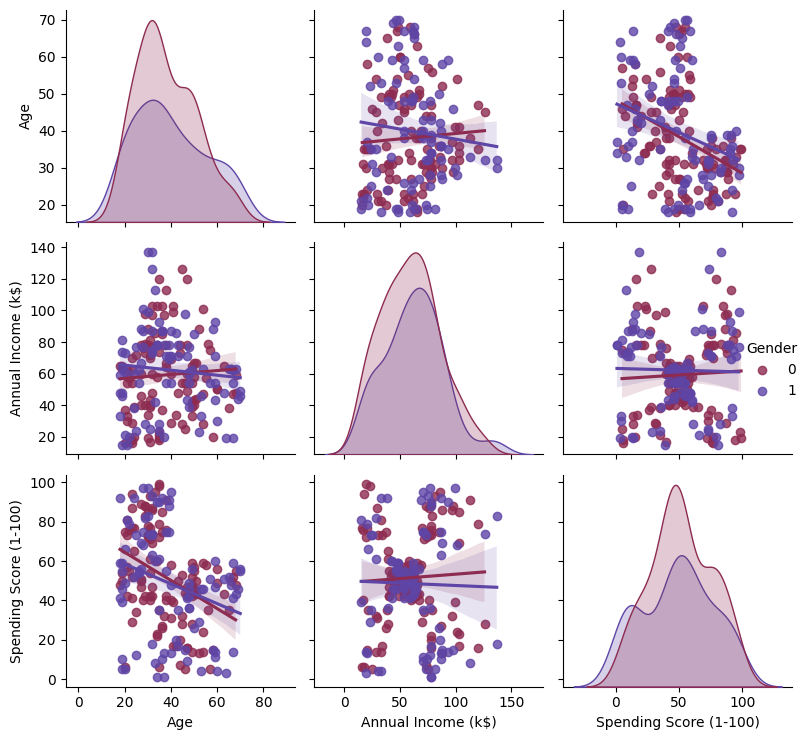

In [15]:
sns.pairplot(df,  kind ="reg", hue = "Gender", palette="twilight_r")
plt.tight_layout()

The above pairplot graphic gives relation between different features while making a difference between genders. 
It can be seen that there is a relation between age, annual income, and spending score. 
We will visualize this more clearly in next sections.

**Age VS Spending Score:**

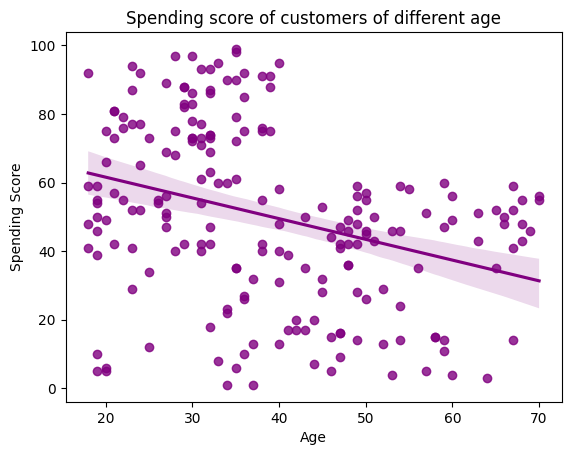

In [38]:
sns.regplot(x='Age', y='Spending Score (1-100)', data=df, color='purple')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Spending score of customers of different age')
plt.show()

Spending score is decreasing with age. Let's analyse the spending score for each gender seperately:

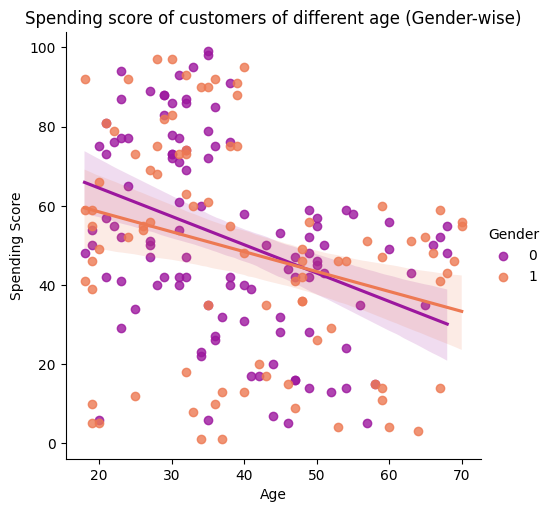

In [39]:
sns.lmplot(x ="Age", y="Spending Score (1-100)", data=df, hue="Gender", palette='plasma')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Spending score of customers of different age (Gender-wise)')
plt.show()

Females tend to spend less after age 50 and spend more before 50 as compared to males. The decrease in spending habits of females wih age is more rapid as compared to men.

**Annual Income V/S Spending Score**:

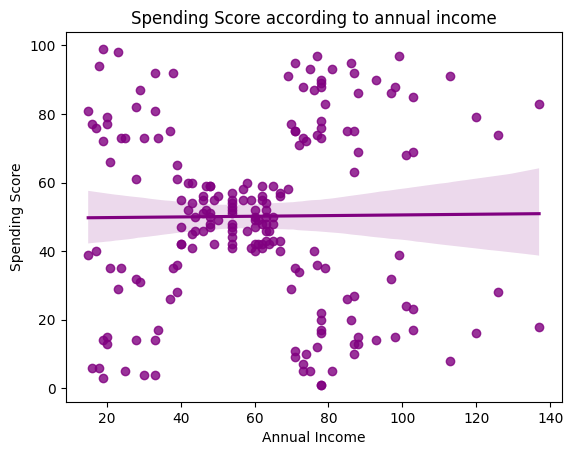

In [29]:
sns.regplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, color='purple')
plt.ylabel('Spending Score')
plt.xlabel('Annual Income')
plt.title('Spending Score according to annual income')
plt.show()

The spending score is saturated between 40 to 60 for different annual income. The average spending score is approximately 50.

Let's analyse the same for different  genders:

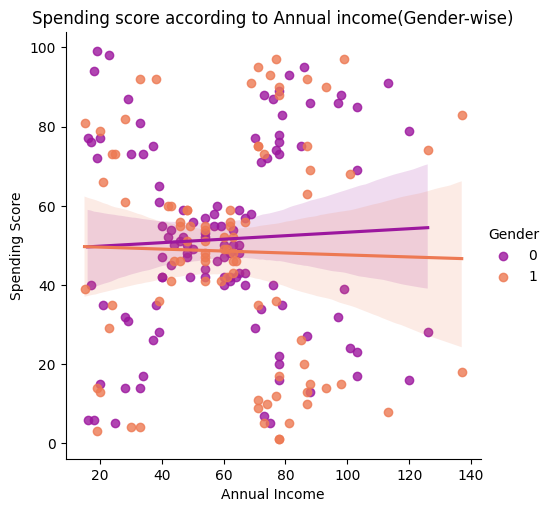

In [35]:
sns.lmplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df,hue='Gender', palette='plasma')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Spending score according to Annual income(Gender-wise)');

We can clearly see that there is a positive corelation between annual income and spending score for female, and slight negative (approximately constant) corelation for males. Means, females with higher salary tend to spend more, while for males, it is almost constant.

**Annual Income VS Age:**

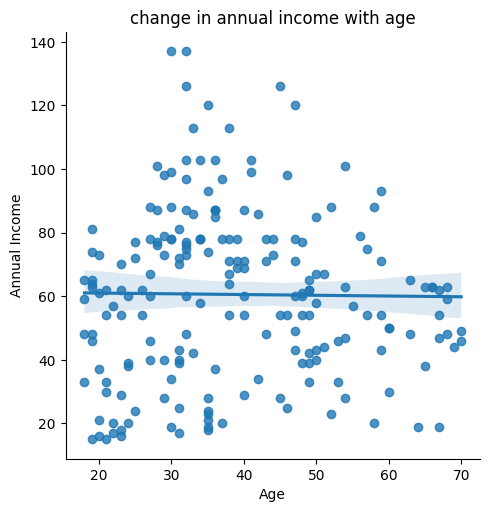

In [15]:
sns.lmplot(x='Age', y='Annual Income (k$)', data=df, palette='green')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('change in annual income with age')
plt.show()

The annual income is almost constant with age. Now, analysing the same for different genders:

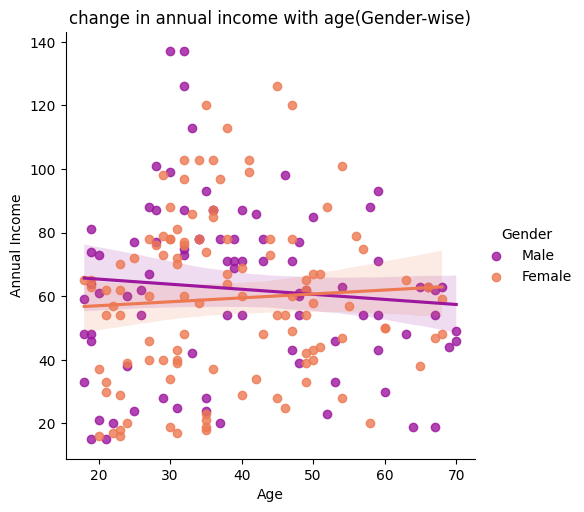

In [18]:
sns.lmplot(x='Age', y='Annual Income (k$)', hue='Gender', data=df, palette='plasma')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('change in annual income with age(Gender-wise)')
plt.show()

The annual income of males tend to decrease with age.

Now, let's analyse this data-set using K-Means clusytering. We will create segments based on customer's annual income and spending behavior, for that, use two columns 'Annual Income (k$)' and 'Spending Score (1-100)' for clustering.

In [7]:
X = df.iloc[:,[3,4]].values

In [8]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Implementing the K-Means clustering for different number of clusters (ranging from 1 to 10) and calculating the within cluster sum of squares (WCSS) for each configuration:

In [11]:
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0, n_init=10)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

Plotting Elbow Point Graph:

(Elbow point is the point where the curve visibly bends, from high slope to low slope).

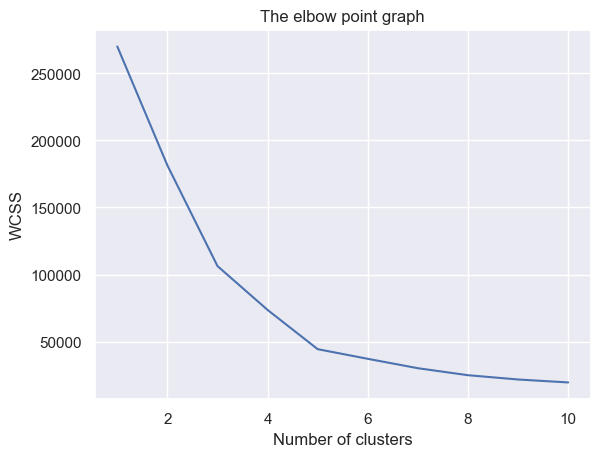

In [12]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The elbow point graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can see from the graph, the optimum number of cluster is 5.

Now, performing K-Means clustering with the chosen numbers:

In [15]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10)

# Return a label for each data point based on their clusters.
Y = kmeans.fit_predict(X)

print(Y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


This step will create a new k-mean object with the chosen number (i.e. 5) and applying it to the data 'X'.

Plotting clusters and their centroids:

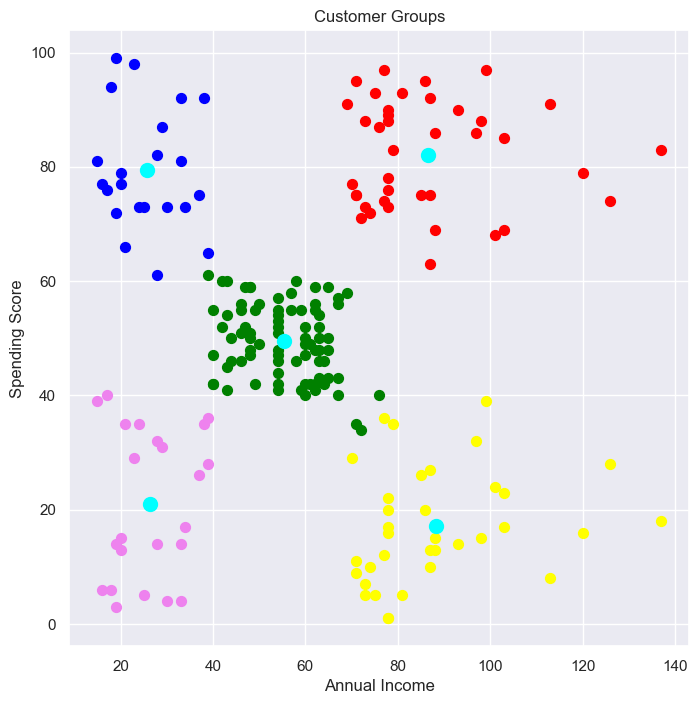

In [19]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='cluster 5')

# plotting the centroids:
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='centrids')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()
